# DiploDatos Kaggle Competition

Grupo 32

Integrantes:

Garay, Carolina del Valle
Ormaechea, Sebastián Gabriel
Ramos, Pablo Nicolás
En esta competencia, el objetivo es predecir si los pasajeros del conjunto de datos "test.csv" fueron transportados a una dimensión alternativa durante la colisión de la nave espacial Titanic con una anomalía del espacio-tiempo. Para ayudarlos a hacer estas predicciones, se les proporciona el conjunto de datos de los registros personales recuperados de la computadora dañada de la nave

train.csv Datos sobre gran parte de los pasajeros, a ser usados para entrenamiento.

-PassengerId - Un identificador para cada pasajero.

-HomePlanet - El planeta del cual partió el pasajero. Típicamente su planeta de residencia permanente.

-CryoSleep - Indica si el pasajero fue electo a ser puesto en suspensión animada durante la duración del viaje. Los pasajeros en CryoSleep están confinados a sus cabinas.

-Cabin - El número de cabina en donde el pasajero se está quedando. Toma la forma piso/número/lado, donde el lado puede ser P por Port oS por Starboard.

-Destination - El destino en donde va a desembarcar el pasajero.

-Age - La edad del pasajero.

-VIP - Si el pasajero pagó por servicios VIP durante el viaje.

-RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Cantidad que el pasajero ha gastado en cada una de las comodidades de lujo del Spaceship Titanic.

-Name - El nombre y apellido de cada pasajero.

-Transported - Si el pasajero fue transportado a otra dimensión o no. Esta es la columna target, la columna a predecir.

test.csv Records personales de los restantes pasajeros, a ser utilizados como datos nuevos desconocidos. Tu objetivo es predecir si cada pasajero de este conjunto fue transportado a otra dimensión o no (variable "Transported").

Deben subir el siguiente archivo: sample_submission.csv El archivo que deben entregar con las predicciones del conjunto test.csv . Debe tener dos columnas, una con el "PassengerId" y otra con el valor de la predicción en la columna "Transported" (0 si no fue transportado y 1 si fue transportado).

En el github de la materia hay un ejemplo de baseline para esta competencia.

Presentamos un código creado como ejemplo de base para la competición.

Deben:

Explorar los datos y aprender de ellos.
Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
Obtener una accuracy mejor que la que se presenta en este ejemplo.
Tratar de obtener la accuracy más alta posible!
Discutir la elección de modelo.
El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

# Importo librerías necesarias

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from datetime import datetime

import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, roc_auc_score, roc_curve


from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import IterativeImputer
from sklearn import tree
from sklearn.impute import KNNImputer

from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, LeaveOneOut, LeavePOut
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from joblib import dump

import os
import numpy as np  # linear algebra
import pandas as pd  #

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

sns.set_context('talk')

import plotly
plotly.__version__

np.set_printoptions(suppress=True)  # no usar notacion "e"

random_seed = np.random.seed(42)

Cargamos el dataset.

In [2]:
df_train = pd.read_csv(os.path.join(os.getcwd(), "data", "train.csv"))

Inspeccionamos los datos

In [3]:
df_train.shape

(7823, 14)

In [4]:
# Fill empty and NaNs values with NaN
dataset = df_train.fillna(np.nan)

# Check for Null values
dataset.isnull().sum()

PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64

In [5]:
# Infos
df_train.info()
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 855.8+ KB


PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64

In [6]:
df_train.dtypes

PassengerId       int64
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object

In [7]:
### Summarize data
# Summarie and statistics
df_train.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7823.000000,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000,7823.000000
mean,4345.691039,28.879389,226.078237,455.643062,172.600393,305.023222,295.476744,0.506711
std,2504.576803,14.461548,679.180148,1621.290107,597.923749,1133.423579,1093.485752,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2182.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4345.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6515.500000,38.000000,44.000000,69.000000,28.000000,58.000000,46.000000,1.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


# Etapa de Análisis de Datos

Se puede decir que, en primera instancia, las columnas PassengerId y Name no son para nada relevantes en el análisis, por lo que se procede a eliminarlas del dataframe

In [8]:
cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


df_train_2 = df_train.copy()
df_train_2 = df_train_2[cols]

A continuación vamos a recorrer cada una de las columnas que no son numéricas, para ver cuantas categorías adoptan cada una de ellas

In [9]:
nonumeric_columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

for column in df_train_2:
    if column in nonumeric_columns:
        print("----------------------------")
        print(f"COLUMNA: {column}")
        print(df_train_2[column].value_counts(dropna=False))
        print("----------------------------")

----------------------------
COLUMNA: HomePlanet
Earth     4114
Europa    1935
Mars      1595
NaN        179
Name: HomePlanet, dtype: int64
----------------------------
----------------------------
COLUMNA: CryoSleep
False    4871
True     2756
NaN       196
Name: CryoSleep, dtype: int64
----------------------------
----------------------------
COLUMNA: Cabin
NaN         184
G/734/S       8
B/201/P       7
F/1194/P      7
E/13/S        7
           ... 
G/323/P       1
E/162/S       1
F/922/P       1
E/522/P       1
G/1323/S      1
Name: Cabin, Length: 6010, dtype: int64
----------------------------
----------------------------
COLUMNA: Destination
TRAPPIST-1e      5316
55 Cancri e      1625
PSO J318.5-22     722
NaN               160
Name: Destination, dtype: int64
----------------------------
----------------------------
COLUMNA: VIP
False    7456
NaN       184
True      183
Name: VIP, dtype: int64
----------------------------


Al recorrer cada una de las columnas que no son numéricas, se observa que la columna Cabin no es relevante, ya que posee muchas categorías por lo que podría sesgar el modelo final, entonces se procede a eliminar dicha columna.

In [10]:
df_train_3 = df_train_2.copy()
df_train_3[["Piso", "Num", "Lado"]] = df_train_3.Cabin.str.split('/', expand=True)
df_train_3.drop("Cabin", inplace=True, axis=1)
df_train_3 = df_train_3.reset_index(drop=True)
df_train_3.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Piso,Num,Lado
0,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,0,C,123,P
1,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,1,F,126,S
2,Europa,True,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1,B,343,S
3,Earth,False,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,0,F,1420,P
4,Earth,False,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,0,G,9,P


# Visualize Missing Values

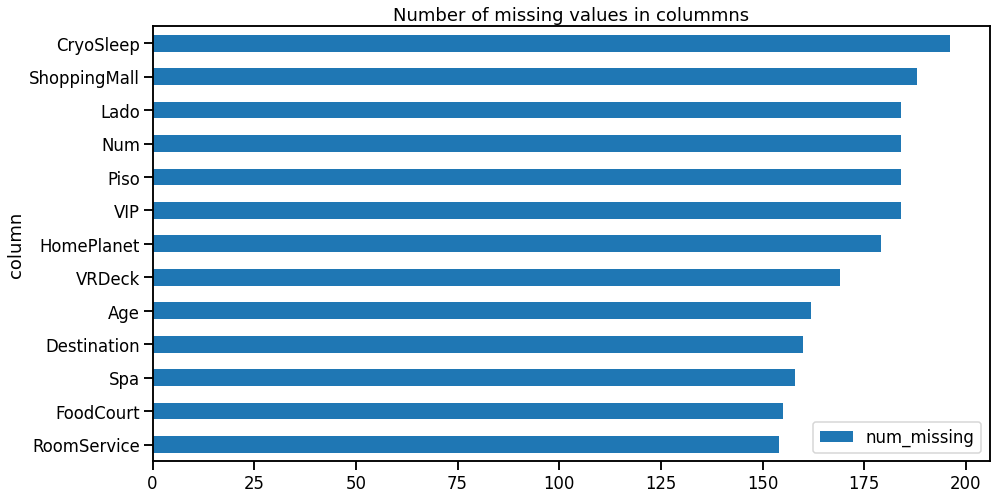

In [11]:
def plot_missing_values(df):
    """ For each column, the number of missing values is plotted."""
    data = [(col, df[col].isnull().sum()) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['column', 'num_missing']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('num_missing')
    pylab.rcParams['figure.figsize'] = (15, 8)
    missing_df.plot(kind='barh', x='column', y='num_missing'); 
    plt.title('Number of missing values in colummns');

    
plot_missing_values(df_train_3)

# Se borran las filas donde todas las columnas tenga valores nulos

In [12]:
df_train_4 = df_train_3.copy()
df_train_4 = df_train_4.dropna(thresh=3)
df_train_4 = df_train_4.reset_index(drop=True)
df_train_4.shape

(7823, 14)

# A continuación se declaran funciones para convertir a números, las variables booleanas (teniendo en cuenta valores faltantes)

In [13]:
def boolean_to_numeric(df, columns_names):
    
    df = df.copy()
    
    for column_name in columns_names:       

        df[column_name] = df.apply(lambda x: int(1) if str(x[column_name]) == "True" else (int(0) if str(x[column_name]) == "False" else x[column_name]), axis=1)
    
    return df

In [14]:
df_train_5 = df_train_4.copy()
df_train_5 = boolean_to_numeric(df_train_4, ["CryoSleep", "VIP"])

In [15]:
# Subdivisión del dataset entre variables predictoras (X) y target(y). ¿Y la división entre datos de entrenamiento y test?
# Convertimos las variables a un dtype conveniente
df_train_5[["HomePlanet", "Destination", "Piso", "Lado"]]  = df_train_5[["HomePlanet", "Destination", "Piso", "Lado"]].astype("category")
df_train_5[["Num"]] = df_train_5[["Num"]].astype("float")


y = df_train_5.Transported
X = df_train_5.drop("Transported", axis=1)
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Piso,Num,Lado
0,Europa,0.0,TRAPPIST-1e,57.0,0.0,0.0,3859.0,13.0,195.0,3874.0,C,123.0,P
1,Mars,1.0,NaN,18.0,0.0,0.0,0.0,0.0,0.0,0.0,F,126.0,S
2,Europa,1.0,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,B,343.0,S
3,Earth,0.0,TRAPPIST-1e,43.0,0.0,142.0,1208.0,0.0,0.0,204.0,F,1420.0,P
4,Earth,0.0,TRAPPIST-1e,19.0,0.0,0.0,0.0,670.0,1.0,34.0,G,9.0,P


In [16]:
catt_columns = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Piso", "Num", "Lado"]

for column in df_train_5:
    if column in catt_columns:
        print("----------------------------")
        print(f"COLUMNA: {column}")
        print(df_train_5[column].value_counts(dropna=False))
        print("----------------------------")

----------------------------
COLUMNA: HomePlanet
Earth     4114
Europa    1935
Mars      1595
NaN        179
Name: HomePlanet, dtype: int64
----------------------------
----------------------------
COLUMNA: CryoSleep
0.0    4871
1.0    2756
NaN     196
Name: CryoSleep, dtype: int64
----------------------------
----------------------------
COLUMNA: Destination
TRAPPIST-1e      5316
55 Cancri e      1625
PSO J318.5-22     722
NaN               160
Name: Destination, dtype: int64
----------------------------
----------------------------
COLUMNA: VIP
0.0    7456
NaN     184
1.0     183
Name: VIP, dtype: int64
----------------------------
----------------------------
COLUMNA: Piso
F      2499
G      2294
E       792
B       698
C       680
D       435
A       237
NaN     184
T         4
Name: Piso, dtype: int64
----------------------------
----------------------------
COLUMNA: Num
NaN       184
82.0       26
19.0       20
86.0       20
269.0      18
         ... 
1837.0      1
1608.0      1

In [17]:
# Dividimos el dataset antes de la imputación y el escalamiento para evitar el data leakage
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state = random_seed)

In [18]:
# Imputamos valores faltantes en las columnas categóricas y booleanas con el valor más frecuente. TRAIN DATASET
imputer = SimpleImputer(strategy="most_frequent")

x_train[["HomePlanet", "Destination", "Piso", "Lado"]] = imputer.fit_transform(x_train[["HomePlanet", "Destination", "Piso", "Lado"]])

x_train.head()

<ipython-input-18-476f41ef5bd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[["HomePlanet", "Destination", "Piso", "Lado"]] = imputer.fit_transform(x_train[["HomePlanet", "Destination", "Piso", "Lado"]])
C:\Users\pablonicolasr\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Piso,Num,Lado
2495,Earth,0.0,TRAPPIST-1e,44.0,0.0,1178.0,1.0,348.0,0.0,0.0,F,521.0,S
2991,Europa,1.0,TRAPPIST-1e,25.0,0.0,0.0,NaN,0.0,NaN,0.0,B,43.0,P
1420,Europa,1.0,55 Cancri e,25.0,0.0,0.0,0.0,0.0,0.0,0.0,C,335.0,S
2481,Earth,1.0,TRAPPIST-1e,3.0,0.0,0.0,0.0,0.0,0.0,0.0,G,652.0,S
5340,Earth,0.0,TRAPPIST-1e,43.0,0.0,224.0,0.0,623.0,0.0,62.0,G,1460.0,P


# Se imputan las variables booleanas. El método elegido consiste en lo siguiente:

Debemos observar el target "Transported". Entonces a los valores NaN de cada columna, le asignamos el valor que es más común para la variable objetivo en esa fila.

In [19]:
x_train["target"] = y_train

x_train.head()

<ipython-input-19-a68fe5901c6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["target"] = y_train


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Piso,Num,Lado,target
2495,Earth,0.0,TRAPPIST-1e,44.0,0.0,1178.0,1.0,348.0,0.0,0.0,F,521.0,S,0
2991,Europa,1.0,TRAPPIST-1e,25.0,0.0,0.0,NaN,0.0,NaN,0.0,B,43.0,P,1
1420,Europa,1.0,55 Cancri e,25.0,0.0,0.0,0.0,0.0,0.0,0.0,C,335.0,S,1
2481,Earth,1.0,TRAPPIST-1e,3.0,0.0,0.0,0.0,0.0,0.0,0.0,G,652.0,S,1
5340,Earth,0.0,TRAPPIST-1e,43.0,0.0,224.0,0.0,623.0,0.0,62.0,G,1460.0,P,0


In [20]:
x_train.groupby(["target", "VIP"]).size()

target  VIP
0       0.0    3305
        1.0     105
1       0.0    3411
        1.0      59
dtype: int64

Luego de haber agrupado el target Transported y la variable VIP, se observa que VIP se puede descartar del dataframe ya que su valor no incide mucho en si el pasajero es transportado a otra dimensión ya que el valor de VIP más común para ambas clases de Tranported es False (0)

In [21]:
# x_train.drop("VIP", inplace=True, axis=1)

# x_train.head()

x_train["VIP"] = x_train.apply(lambda x: 0 if (pd.isna(x["VIP"]) and int(x["target"]) == 1) else (1 if (pd.isna(x["VIP"]) and int(x["target"]) == 0) else x["VIP"]), axis=1)

<ipython-input-21-2b7bfb837d16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["VIP"] = x_train.apply(lambda x: 0 if (pd.isna(x["VIP"]) and int(x["target"]) == 1) else (1 if (pd.isna(x["VIP"]) and int(x["target"]) == 0) else x["VIP"]), axis=1)


In [22]:
x_train.groupby(["CryoSleep", "target"]).size()

CryoSleep  target
0.0        0         2950
           1         1437
1.0        0          457
           1         2021
dtype: int64

In [23]:
x_train.groupby(["target", "CryoSleep"]).size()

target  CryoSleep
0       0.0          2950
        1.0           457
1       0.0          1437
        1.0          2021
dtype: int64

In [24]:
x_train["CryoSleep"] = x_train.apply(lambda x: 1 if (pd.isna(x["CryoSleep"]) and int(x["target"]) == 1) else (0 if (pd.isna(x["CryoSleep"]) and int(x["target"]) == 0) else x["CryoSleep"]), axis=1)

<ipython-input-24-a1a294675ebb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["CryoSleep"] = x_train.apply(lambda x: 1 if (pd.isna(x["CryoSleep"]) and int(x["target"]) == 1) else (0 if (pd.isna(x["CryoSleep"]) and int(x["target"]) == 0) else x["CryoSleep"]), axis=1)


In [25]:
x_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Piso,Num,Lado,target
2495,Earth,0.0,TRAPPIST-1e,44.0,0.0,1178.0,1.0,348.0,0.0,0.0,F,521.0,S,0
2991,Europa,1.0,TRAPPIST-1e,25.0,0.0,0.0,NaN,0.0,NaN,0.0,B,43.0,P,1
1420,Europa,1.0,55 Cancri e,25.0,0.0,0.0,0.0,0.0,0.0,0.0,C,335.0,S,1
2481,Earth,1.0,TRAPPIST-1e,3.0,0.0,0.0,0.0,0.0,0.0,0.0,G,652.0,S,1
5340,Earth,0.0,TRAPPIST-1e,43.0,0.0,224.0,0.0,623.0,0.0,62.0,G,1460.0,P,0


In [26]:
x_train["CryoSleep"].value_counts(dropna=False)

0.0    4473
1.0    2567
Name: CryoSleep, dtype: int64

In [27]:
x_train[["CryoSleep"]] = x_train[["CryoSleep"]].astype("int")

C:\Users\pablonicolasr\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [28]:
x_train.drop("target", inplace=True, axis=1)

C:\Users\pablonicolasr\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
# Imputamos valores faltantes en las columnas cuantitativas con KNN. TRAIN DATASET
Qcols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

imputerKNN = KNNImputer()

x_train[Qcols] = imputerKNN.fit_transform(x_train[Qcols])

<ipython-input-29-89bde30b8fe4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[Qcols] = imputerKNN.fit_transform(x_train[Qcols])
C:\Users\pablonicolasr\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [30]:
x_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Piso,Num,Lado
2495,Earth,0,TRAPPIST-1e,44.0,0.0,1178.0,1.0,348.0,0.0,0.0,F,521.0,S
2991,Europa,1,TRAPPIST-1e,25.0,0.0,0.0,291.8,0.0,0.0,0.0,B,43.0,P
1420,Europa,1,55 Cancri e,25.0,0.0,0.0,0.0,0.0,0.0,0.0,C,335.0,S
2481,Earth,1,TRAPPIST-1e,3.0,0.0,0.0,0.0,0.0,0.0,0.0,G,652.0,S
5340,Earth,0,TRAPPIST-1e,43.0,0.0,224.0,0.0,623.0,0.0,62.0,G,1460.0,P


In [31]:
x_train[["VIP"]] = x_train[["VIP"]].astype("int")

C:\Users\pablonicolasr\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# Categorizamos la edad

#def age_to_etareo(age):
    
    #if age >= 0 and age <= 20:
        
        #return "menor"
    
    #elif age >= 21 and age <= 65:
        
        #return "mayor"
    
    #else:
        
        #return "vejez"

In [ ]:
#x_train["Age"] = x_train.apply(lambda x: age_to_etareo(x["Age"]), axis=1)

In [ ]:
#x_train["Age"] = x_train["Age"].astype("category")

In [ ]:
#x_train.head()

In [ ]:
#x_train_vf = x_train.copy()

#x_train_vf["quantity"] = x_train_vf["RoomService"] + x_train_vf["FoodCourt"] + x_train_vf["ShoppingMall"] + x_train_vf["Spa"] + x_train_vf["VRDeck"] 

#x_train_vf.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], inplace=True, axis=1)

#x_train_vf.head()

In [ ]:
#def quantity_to_categorical(cantidad):
    
    #if cantidad == 0:
        
        #return "nada"
    
    #elif cantidad >= 0 and cantidad <= 1000:
        
        #return "algo"
    
    #else:
        
        #return "mucho"

In [ ]:
#x_train_vf["quantity"] = x_train_vf.apply(lambda x: quantity_to_categorical(x["quantity"]), axis=1)

In [ ]:
#x_train_vf.head()

In [ ]:
#x_train_vf["quantity"] = x_train_vf["quantity"].astype("category")

In [32]:
# Revisamos las variables categóricas antes de aplicar la codificación
cat_columns = ["HomePlanet", "CryoSleep", "Destination", "Piso", "Lado"]


for column in x_train:
    if column in cat_columns:
        print("----------------------------")
        print(f"COLUMNA: {column}")
        print(x_train[column].value_counts(dropna=False))
        print("----------------------------")

----------------------------
COLUMNA: HomePlanet
Earth     3881
Europa    1723
Mars      1436
Name: HomePlanet, dtype: int64
----------------------------
----------------------------
COLUMNA: CryoSleep
0    4473
1    2567
Name: CryoSleep, dtype: int64
----------------------------
----------------------------
COLUMNA: Destination
TRAPPIST-1e      4918
55 Cancri e      1474
PSO J318.5-22     648
Name: Destination, dtype: int64
----------------------------
----------------------------
COLUMNA: Piso
F    2419
G    2074
E     710
B     630
C     597
D     395
A     211
T       4
Name: Piso, dtype: int64
----------------------------
----------------------------
COLUMNA: Lado
S    3626
P    3414
Name: Lado, dtype: int64
----------------------------


In [33]:
x_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Piso,Num,Lado
2495,Earth,0,TRAPPIST-1e,44.0,0,1178.0,1.0,348.0,0.0,0.0,F,521.0,S
2991,Europa,1,TRAPPIST-1e,25.0,0,0.0,291.8,0.0,0.0,0.0,B,43.0,P
1420,Europa,1,55 Cancri e,25.0,0,0.0,0.0,0.0,0.0,0.0,C,335.0,S
2481,Earth,1,TRAPPIST-1e,3.0,0,0.0,0.0,0.0,0.0,0.0,G,652.0,S
5340,Earth,0,TRAPPIST-1e,43.0,0,224.0,0.0,623.0,0.0,62.0,G,1460.0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,Europa,0,TRAPPIST-1e,34.0,1,0.0,5210.0,0.0,1332.0,2.0,A,65.0,S
5390,Mars,0,TRAPPIST-1e,42.0,0,913.0,4.0,1.0,1465.0,0.0,D,121.0,S
860,Earth,0,TRAPPIST-1e,27.0,0,0.0,0.0,580.0,211.0,0.0,E,273.0,S
7603,Earth,0,TRAPPIST-1e,35.0,0,702.0,104.0,5.0,76.0,0.0,G,885.0,S


In [34]:
# Escalamos los datos cuantitativos mediante Robust Scaler para controlar outliers
from sklearn import preprocessing

escalador = preprocessing.RobustScaler()

x_train[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = escalador.fit_transform(x_train[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])

x_train.head()

<ipython-input-34-9c0ef54456b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = escalador.fit_transform(x_train[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])
C:\Users\pablonicolasr\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Piso,Num,Lado
2495,Earth,0,TRAPPIST-1e,0.952381,0,23.442786,0.013158,11.225806,0.0,0.000000,F,521.0,S
2991,Europa,1,TRAPPIST-1e,-0.112045,0,0.000000,3.839474,0.000000,0.0,0.000000,B,43.0,P
1420,Europa,1,55 Cancri e,-0.112045,0,0.000000,0.000000,0.000000,0.0,0.000000,C,335.0,S
2481,Earth,1,TRAPPIST-1e,-1.344538,0,0.000000,0.000000,0.000000,0.0,0.000000,G,652.0,S
5340,Earth,0,TRAPPIST-1e,0.896359,0,4.457711,0.000000,20.096774,0.0,1.265306,G,1460.0,P


In [35]:
# Aplicamos hot encoding a las categóricas
x_train_hot = pd.get_dummies(data=x_train, columns=["HomePlanet", "Destination", "Lado", "Piso"])
x_train_hot.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Earth,...,Lado_P,Lado_S,Piso_A,Piso_B,Piso_C,Piso_D,Piso_E,Piso_F,Piso_G,Piso_T
2495,0,0.952381,0,23.442786,0.013158,11.225806,0.0,0.000000,521.0,1,...,0,1,0,0,0,0,0,1,0,0
2991,1,-0.112045,0,0.000000,3.839474,0.000000,0.0,0.000000,43.0,0,...,1,0,0,1,0,0,0,0,0,0
1420,1,-0.112045,0,0.000000,0.000000,0.000000,0.0,0.000000,335.0,0,...,0,1,0,0,1,0,0,0,0,0
2481,1,-1.344538,0,0.000000,0.000000,0.000000,0.0,0.000000,652.0,1,...,0,1,0,0,0,0,0,0,1,0
5340,0,0.896359,0,4.457711,0.000000,20.096774,0.0,1.265306,1460.0,1,...,1,0,0,0,0,0,0,0,1,0


In [36]:
# Transformaciones sobre el TEST DATASET

# Imputamos valores faltantes en las columnas categóricas con el valor más frecuente.

imputer = SimpleImputer(strategy="most_frequent")
x_test[["HomePlanet", "Destination", "Piso", "Lado"]] = imputer.fit_transform(x_test[["HomePlanet", "Destination", "Piso", "Lado"]])

x_test.head()

<ipython-input-36-4bb7dc90e010>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[["HomePlanet", "Destination", "Piso", "Lado"]] = imputer.fit_transform(x_test[["HomePlanet", "Destination", "Piso", "Lado"]])
C:\Users\pablonicolasr\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Piso,Num,Lado
1142,Mars,0.0,TRAPPIST-1e,21.0,0.0,2947.0,0.0,287.0,27.0,0.0,D,8.0,P
4258,Mars,0.0,TRAPPIST-1e,21.0,0.0,32.0,0.0,1008.0,0.0,0.0,F,1584.0,S
2166,Earth,0.0,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,NaN,P
1677,Mars,1.0,55 Cancri e,45.0,0.0,0.0,0.0,0.0,0.0,0.0,F,1050.0,S
3534,Mars,0.0,TRAPPIST-1e,20.0,0.0,2502.0,0.0,96.0,0.0,0.0,F,526.0,P


In [37]:
y_test.head()

1142    0
4258    1
2166    1
1677    1
3534    0
Name: Transported, dtype: int64

In [38]:
x_test["target"] = y_test

x_test.head()

<ipython-input-38-cd82de85aef3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["target"] = y_test


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Piso,Num,Lado,target
1142,Mars,0.0,TRAPPIST-1e,21.0,0.0,2947.0,0.0,287.0,27.0,0.0,D,8.0,P,0
4258,Mars,0.0,TRAPPIST-1e,21.0,0.0,32.0,0.0,1008.0,0.0,0.0,F,1584.0,S,1
2166,Earth,0.0,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,NaN,P,1
1677,Mars,1.0,55 Cancri e,45.0,0.0,0.0,0.0,0.0,0.0,0.0,F,1050.0,S,1
3534,Mars,0.0,TRAPPIST-1e,20.0,0.0,2502.0,0.0,96.0,0.0,0.0,F,526.0,P,0


In [39]:
#x_test.drop("VIP", inplace=True, axis=1)
#x_test.head()

In [40]:
x_test["CryoSleep"] = x_test.apply(lambda x: 1 if (pd.isna(x["CryoSleep"]) and int(x["target"]) == 1) else (0 if (pd.isna(x["CryoSleep"]) and int(x["target"]) == 0) else x["CryoSleep"]), axis=1)
x_test["VIP"] = x_test.apply(lambda x: 0 if (pd.isna(x["VIP"]) and int(x["target"]) == 1) else (1 if (pd.isna(x["VIP"]) and int(x["target"]) == 0) else x["VIP"]), axis=1)

x_test[["CryoSleep"]]  = x_test[["CryoSleep"]].astype("int")
x_train[["VIP"]]  = x_train[["VIP"]].astype("int")

x_test.head()

x_test.drop("target", inplace=True, axis=1)

# Imputamos valores faltantes en las columnas cuantitativas con KNN. TRAIN DATASET
Qcols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
imputerKNN = KNNImputer()
x_test[Qcols] = imputerKNN.fit_transform(x_test[Qcols])

# Escalamiento
escalador = preprocessing.RobustScaler()
x_test[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = escalador.fit_transform(x_test[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])

# Hot encoding a las categóricas
x_test_hot = pd.get_dummies(data=x_test, columns=["HomePlanet", "Destination", "Lado", "Piso"]).drop(columns=["Num"])

<ipython-input-40-9f824a558489>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["CryoSleep"] = x_test.apply(lambda x: 1 if (pd.isna(x["CryoSleep"]) and int(x["target"]) == 1) else (0 if (pd.isna(x["CryoSleep"]) and int(x["target"]) == 0) else x["CryoSleep"]), axis=1)
<ipython-input-40-9f824a558489>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["VIP"] = x_test.apply(lambda x: 0 if (pd.isna(x["VIP"]) and int(x["target"]) == 1) else (1 if (pd.isna(x["VIP"]) and int(x["target"]) == 0) else x["

In [41]:
x_test_hot.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Destination_TRAPPIST-1e,Lado_P,Lado_S,Piso_A,Piso_B,Piso_C,Piso_D,Piso_E,Piso_F,Piso_G
1142,0,-0.352941,0.0,111.207547,0.0,11.958333,0.692308,0.0,0,0,...,1,1,0,0,0,0,1,0,0,0
4258,0,-0.352941,0.0,1.207547,0.0,42.000000,0.000000,0.0,0,0,...,1,0,1,0,0,0,0,0,1,0
2166,0,-1.588235,0.0,0.000000,0.0,0.000000,0.000000,0.0,1,0,...,1,1,0,0,0,0,0,0,1,0
1677,1,1.058824,0.0,0.000000,0.0,0.000000,0.000000,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
3534,0,-0.411765,0.0,94.415094,0.0,4.000000,0.000000,0.0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [42]:
# Acondicionamiento de detalles en ambos datasets por requerimientos de los siguientes métodos a utilizar
x_train_hot = x_train_hot.drop(columns=['Piso_T']) #Tuve que eliminar esta columna porque estaba ausente en el conjunto de test
#x_test_hot = x_test_hot.drop(columns=['Piso_T'])

KeyError: "['Piso_T'] not found in axis"

In [43]:
print(x_train_hot.shape)
print(x_test_hot.shape)

(7040, 24)
(783, 23)


In [44]:
x_train_hot.drop("Num", inplace=True, axis=1)
x_train_hot.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Destination_TRAPPIST-1e,Lado_P,Lado_S,Piso_A,Piso_B,Piso_C,Piso_D,Piso_E,Piso_F,Piso_G
2495,0,0.952381,0,23.442786,0.013158,11.225806,0.0,0.000000,1,0,...,1,0,1,0,0,0,0,0,1,0
2991,1,-0.112045,0,0.000000,3.839474,0.000000,0.0,0.000000,0,1,...,1,1,0,0,1,0,0,0,0,0
1420,1,-0.112045,0,0.000000,0.000000,0.000000,0.0,0.000000,0,1,...,0,0,1,0,0,1,0,0,0,0
2481,1,-1.344538,0,0.000000,0.000000,0.000000,0.0,0.000000,1,0,...,1,0,1,0,0,0,0,0,0,1
5340,0,0.896359,0,4.457711,0.000000,20.096774,0.0,1.265306,1,0,...,1,1,0,0,0,0,0,0,0,1


In [ ]:
# x_test["Age"] = x_test.apply(lambda x: age_to_etareo(x["Age"]), axis=1)

# x_test["Age"] = x_test["Age"].astype("category")

# x_test.head()

In [ ]:
# x_test_vf = x_test.copy()

# x_test_vf["quantity"] = x_test_vf["RoomService"] + x_test_vf["FoodCourt"] + x_test_vf["ShoppingMall"] + x_test_vf["Spa"] + x_test_vf["VRDeck"] 

# x_test_vf.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], inplace=True, axis=1)

# x_test_vf.head()

In [ ]:
# x_test_vf["quantity"] = x_test_vf.apply(lambda x: quantity_to_categorical(x["quantity"]), axis=1)

# x_test_vf.head()

In [ ]:
# x_test_vf["quantity"] = x_test_vf["quantity"].astype("category")

In [ ]:
# x_test_vf.head()

In [45]:
print(x_train_hot.shape)
print(x_test_hot.shape)

(7040, 23)
(783, 23)


In [46]:
features = x_train_hot.columns.values
target = y_train.values

X_anova = np.array(x_train_hot[features])
y_anova = np.array(target).ravel()

fs = SelectKBest(score_func = f_classif, k = len(features))

fs.fit(X_anova, y_anova)

SelectKBest(k=4)

scores_df = pd.DataFrame({"Feature": features, "Score": fs.scores_}).sort_values(["Score"], ascending = [False])
scores_df

,Feature,Score
0,CryoSleep,2130.210838
3,RoomService,437.874585
6,Spa,334.889509
7,VRDeck,318.743071
9,HomePlanet_Europa,234.760733
8,HomePlanet_Earth,182.580566
17,Piso_B,150.930636
11,Destination_55 Cancri e,93.923537
18,Piso_C,80.394625
14,Lado_P,75.383450


# Planteo modelos

Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [47]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_verd, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          ax=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_verd, y_pred)
    classes = classes[unique_labels(y_verd, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    if ax == None:
        fig, ax = plt.subplots()    


    am = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(am, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           ylabel='Etiqueta correcta',
           xlabel='Etiqueta predicha',
           title=title,)

    

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    return ax

In [48]:
# Planteo de modelo SGDClassifier con parámetros por defecto

Simple_model = SGDClassifier(random_state=1)
Simple_model.fit(x_train_hot, y_train)

y_train_pred = Simple_model.predict(x_train_hot)
y_test_pred = Simple_model.predict(x_test_hot)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


print(f"Train accuracy: {train_acc:0.3}")
print(f"Test accuracy: {test_acc:0.3}")

Train accuracy: 0.792
Test accuracy: 0.816


In [49]:
# Planteo de modelo SGDClassifier con parámetros definidos por GridSearch a ojo

max_iter = [10000, 100000, 1000000]
eta0 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 1000000]

F_model = SGDClassifier(random_state=1)
F_model.fit(x_train_hot, y_train)

param_grid = {'max_iter': max_iter,'eta0':eta0}
cv = GridSearchCV(F_model, param_grid, cv=5)

cv.fit(x_train_hot, y_train)
best_params=cv.best_params_

Best_F_model = SGDClassifier(max_iter=best_params["max_iter"], eta0=best_params["eta0"], random_state=1)
Best_F_model.fit(x_train_hot, y_train)

y_train_pred = F_model.predict(x_train_hot)
y_test_pred = F_model.predict(x_test_hot)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:0.3}")
print(f"Test accuracy: {test_acc:0.3}")

Train accuracy: 0.792
Test accuracy: 0.816


In [50]:
params = {#'criterion':('gini','entropy'), 
    "min_samples_leaf": (2, 3, 4),
    "min_samples_split": (100,110,120),
        #'max_features':("auto","sqrt","log2",None),
    "n_estimators" : (70,80,90)
}

clf2 = RFC(random_state=22, criterion="gini", max_features="auto")
grid = GridSearchCV(clf2, params, scoring="accuracy", cv=10, n_jobs=4)

grid.fit(x_train_hot, y_train)

print("Best Decision Tree accuracy: ", grid.best_score_)
print(grid.best_estimator_)

Best Decision Tree accuracy:  0.7992897727272729
RandomForestClassifier(min_samples_leaf=3, min_samples_split=100,
                       n_estimators=70, random_state=22)


In [57]:
clf2 = RFC(random_state=22, criterion="entropy", min_samples_leaf=2, min_samples_split=100, n_estimators=70)

clf2.fit(x_train_hot, y_train)

print("Train dataset accuracy: %0.03f" % clf2.score(x_train_hot, y_train))

Train dataset accuracy: 0.822


In [58]:
params={#'criterion':('gini','entropy'), 
        'min_samples_leaf':(2,3,4),
        'min_samples_split':(100,110,120),
        #'max_features':("auto","sqrt","log2",None),
        'n_estimators' : (70,80,90)}

clf5 = RFC(random_state=617, criterion='entropy', max_features="auto")
grid = GridSearchCV(clf5, params, scoring='accuracy', cv=10, n_jobs=4)
grid.fit(x_train_hot, y_train)
print('Best Decision Tree accuracy: ', grid.best_score_)
print(grid.best_estimator_)

Best Decision Tree accuracy:  0.8007102272727273
RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=100, n_estimators=70,
                       random_state=617)


In [60]:
clf5 = RFC(random_state=617, criterion="entropy",
                                       max_features="auto", min_samples_leaf=2,
                       min_samples_split=110, n_estimators=70)

clf5.fit(x_train_hot, y_train)
print("Train dataset accuracy: %0.03f" % clf5.score(x_train_hot,y_train))

Train dataset accuracy: 0.823


Test dataset accuracy: 0.837
****Reporte de clasificación sobre conjunto de evaluación (métricas)*****
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       366
           1       0.86      0.83      0.84       417

    accuracy                           0.84       783
   macro avg       0.84      0.84      0.84       783
weighted avg       0.84      0.84      0.84       783



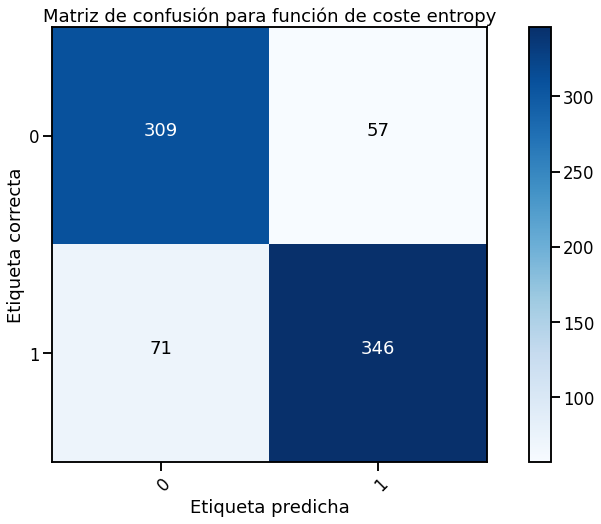

In [61]:
y_test_predt5 = clf5.predict(x_test_hot)
print("Test dataset accuracy: %0.03f" % clf5.score(x_test_hot,y_test))
print("****Reporte de clasificación sobre conjunto de evaluación (métricas)*****") 
print(classification_report(y_test, y_test_predt5)) 
plot_confusion_matrix(y_test, y_test_predt5, classes=df_train.Transported.unique(),
                        title="Matriz de confusión para función de coste entropy");

In [62]:
clfs =  [DecisionTreeClassifier(),
        RFC(),
        LogisticRegression(),
        MLPClassifier(),
        XGBClassifier(),
        GaussianNB(),
        LinearSVC()]

names = ['Arbol de decisión',
        'Random Forest',
        'Regresión Logística',
        'Perceptrón multicapa',
        'XGBoost',
        'Naive Bayes',
        'SVM']

trained_models = []
accuracy_models = []
for clf, name in zip(clfs, names):
    print(name)
    clf.fit(x_train_hot, y_train)
    train_predictions = clf.predict(x_train_hot)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    test_predictions = clf.predict(x_test_hot)
    accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    trained_models.append(clf)    
    accuracy_models.append(accuracy)

Arbol de decisión
Accuracy train Arbol de decisión: 95.16%
Accuracy test Arbol de decisión: 76.25%
Random Forest
Accuracy train Random Forest: 95.16%
Accuracy test Random Forest: 81.23%
Regresión Logística
Accuracy train Regresión Logística: 79.74%
Accuracy test Regresión Logística: 81.35%
Perceptrón multicapa


C:\Users\pablonicolasr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy train Perceptrón multicapa: 82.70%
Accuracy test Perceptrón multicapa: 83.91%
XGBoost
Accuracy train XGBoost: 90.33%
Accuracy test XGBoost: 82.76%
Naive Bayes
Accuracy train Naive Bayes: 73.91%
Accuracy test Naive Bayes: 78.29%
SVM
Accuracy train SVM: 77.83%
Accuracy test SVM: 79.18%


C:\Users\pablonicolasr\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [63]:
class_weight = [None,'balanced']
boosting_type = ['gbdt', 'goss', 'dart']
num_leaves = [30,100,150] #list(range(30, 150)),
learning_rate = list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 10)) #1000
lgg_grid = dict(class_weight=class_weight, boosting_type=boosting_type, num_leaves=num_leaves, learning_rate =learning_rate)

In [64]:
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from numpy import mean
from numpy import std

params={#'criterion':('gini','entropy'), 
        'n_estimators':(10,50,100,500,1000),
        'boosting_type':('gbdt', 'goss', 'dart'),
        'learning_rate':(0.0001,0.001,0.01,0.1,1.0),
        #'n_estimators' : (70,80,90)
        }

clf5 = LGBMClassifier(random_state=22)
grid = GridSearchCV(clf5, params, scoring='accuracy', cv=5,n_jobs=4)
grid.fit(x_train_hot,y_train)
print('Best Decision Tree accuracy: ', grid.best_score_)
print(grid.best_estimator_)

Best Decision Tree accuracy:  0.8049715909090909
LGBMClassifier(learning_rate=0.01, n_estimators=500, random_state=22)


In [65]:
etc2 = LGBMClassifier(random_state=22,n_estimators=500, boosting_type='dart',
        learning_rate=0.01, num_leaves = 32)
                     
etc2.fit(x_train_hot, y_train)
print("Train dataset accuracy: %0.03f" % etc2.score(x_train_hot,y_train))
y_test_predt5 = etc2.predict(x_test_hot)
print("Test dataset accuracy: %0.03f" % etc2.score(x_test_hot,y_test))

Train dataset accuracy: 0.822
Test dataset accuracy: 0.824


In [66]:
model = LGBMClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=22)
n_scores = cross_val_score(model, x_train_hot, y_train, scoring='accuracy', cv=10, n_jobs=-1)

In [67]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.009)


In [68]:
from sklearn.ensemble import ExtraTreesClassifier as ETC

etc1 = ETC(criterion='entropy', max_features=13,
                     min_samples_split=99, n_estimators=9, n_jobs=4,
                     random_state=22)
etc1.fit(x_train_hot, y_train)
print("Train dataset accuracy: %0.03f" % etc1.score(x_train_hot,y_train))
y_test_predt5 = etc1.predict(x_test_hot)
print("Test dataset accuracy: %0.03f" % etc1.score(x_test_hot,y_test))

Train dataset accuracy: 0.829
Test dataset accuracy: 0.822


In [69]:
etc1 = ETC(criterion='entropy', max_features=12,
                     min_samples_leaf=1,min_samples_split=187, n_estimators=20, n_jobs=4,
                     random_state=22)
etc1.fit(x_train_hot, y_train)
print("Train dataset accuracy: %0.03f" % etc1.score(x_train_hot,y_train))
y_test_predt5 = etc1.predict(x_test_hot)
print("Test dataset accuracy: %0.03f" % etc1.score(x_test_hot,y_test))

Train dataset accuracy: 0.813
Test dataset accuracy: 0.831


In [70]:
print("****Reporte de clasificación sobre conjunto de evaluación (métricas)*****") 
print(classification_report(y_test, y_test_predt5)) 

****Reporte de clasificación sobre conjunto de evaluación (métricas)*****
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       366
           1       0.85      0.83      0.84       417

    accuracy                           0.83       783
   macro avg       0.83      0.83      0.83       783
weighted avg       0.83      0.83      0.83       783



In [71]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=100)

In [72]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [73]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train_hot, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [74]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.798 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.789 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.800 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.790 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.798 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.790 (+/-0.018) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'

In [75]:
y_true, y_pred = y_test , clf.predict(x_test_hot)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       366
           1       0.85      0.84      0.85       417

    accuracy                           0.84       783
   macro avg       0.83      0.83      0.83       783
weighted avg       0.84      0.84      0.84       783



In [76]:
mlp = MLPClassifier(activation="relu", alpha=0.001, learning_rate="constant", hidden_layer_sizes=(100,), solver="adam", random_state=np.random.seed(42))

In [77]:
mlp.fit(x_train_hot, y_train)
print("Train dataset accuracy: %0.03f" % mlp.score(x_train_hot,y_train))
y_test_predt5 = mlp.predict(x_test_hot)
print("Test dataset accuracy: %0.03f" % mlp.score(x_test_hot,y_test))

Train dataset accuracy: 0.825
Test dataset accuracy: 0.840


In [78]:
etc1 = ETC(criterion='entropy', max_features=15,
                     min_samples_leaf=10, min_samples_split=49, n_estimators=29, n_jobs=4,
                     random_state=517)
etc1.fit(x_train_hot, y_train)
print("Train dataset accuracy: %0.03f" % etc1.score(x_train_hot,y_train))
y_test_predt5 = etc1.predict(x_test_hot)
print("Test dataset accuracy: %0.03f" % etc1.score(x_test_hot,y_test))

Train dataset accuracy: 0.827
Test dataset accuracy: 0.825
